<a href="https://colab.research.google.com/github/NaveedhAhmed-A/Data-analysis/blob/main/diabetes_prediction_using_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
d1=pd.read_csv('/content/i1.csv')
d2=pd.read_csv('/content/i2.csv')

decision tree


In [9]:
print(d1.shape)

(7242, 16)


In [10]:
d2.shape

(8379, 16)

In [11]:
d=d1.merge(d2,how='outer') #merge all data without changing;

In [6]:
d.shape

(15621, 16)

In [12]:
d.head()

,Date,Timestamp,Invoice No.,Item Name,Price,Qty.,Sub Total,Discount,Tax,Final Total,Table No.,Server Name,Covers,Variation,Category,HSN
0,2023-04-01,2023-04-01 13:16:03,23465,Babycorn Manchurian,160.0,1.0,160.0,0.0,8.0,168.0,20.0,biller,0,NaN,Veg Starters,NaN
1,2023-04-01,2023-04-01 13:16:03,23465,Chicken Kati Roll,120.0,1.0,120.0,0.0,6.0,126.0,20.0,biller,0,NaN,NON VEG STARTERS CHICKEN,NaN
2,2023-04-01,2023-04-01 13:16:03,23465,Paneer Butter Masala,150.0,2.0,300.0,0.0,15.0,315.0,20.0,biller,0,NaN,Veg Gravy,NaN
3,2023-04-01,2023-04-01 13:16:03,23465,Pulka (2 No),40.0,3.0,120.0,0.0,6.0,126.0,20.0,biller,0,NaN,Indian Breads,NaN
4,2023-04-01,2023-04-01 13:16:03,23465,Schewan Chicken Fried Rice,160.0,1.0,160.0,0.0,8.0,168.0,20.0,biller,0,NaN,NON VEG BRIYANI & RICE,NaN


In [13]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15621 entries, 0 to 15620
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         15621 non-null  object 
 1   Timestamp    15621 non-null  object 
 2   Invoice No.  15621 non-null  int64  
 3   Item Name    15621 non-null  object 
 4   Price        15621 non-null  float64
 5   Qty.         15621 non-null  float64
 6   Sub Total    15621 non-null  float64
 7   Discount     15621 non-null  float64
 8   Tax          15621 non-null  float64
 9   Final Total  15621 non-null  float64
 10  Table No.    15613 non-null  float64
 11  Server Name  15621 non-null  object 
 12  Covers       15621 non-null  int64  
 13  Variation    15 non-null     object 
 14  Category     15621 non-null  object 
 15  HSN          0 non-null      float64
dtypes: float64(8), int64(2), object(6)
memory usage: 1.9+ MB


In [14]:
d.isna().sum()

,0
Date,0
Timestamp,0
Invoice No.,0
Item Name,0
Price,0
Qty.,0
Sub Total,0
Discount,0
Tax,0
Final Total,0


In [15]:
d.describe()

,Invoice No.,Price,Qty.,Sub Total,Discount,Tax,Final Total,Table No.,Covers,HSN
count,15621.000000,15621.000000,15621.000000,15621.000000,15621.000000,15621.000000,15621.000000,15613.000000,15621.0,0.0
mean,25989.963127,116.608988,1.338839,147.407080,1.262818,7.303668,153.447930,18.068340,0.0,NaN
std,1433.192998,63.663769,0.949814,210.127442,6.656396,10.461474,219.678163,17.191377,0.0,NaN
min,23465.000000,12.000000,1.000000,12.000000,0.000000,0.000000,12.600000,1.000000,0.0,NaN
25%,24751.000000,50.000000,1.000000,80.000000,0.000000,4.000000,84.000000,4.000000,0.0,NaN
50%,25980.000000,140.000000,1.000000,150.000000,0.000000,7.000000,147.000000,12.000000,0.0,NaN
75%,27274.000000,160.000000,1.000000,170.000000,0.000000,8.500000,178.500000,26.000000,0.0,NaN
max,28389.000000,770.000000,28.000000,21560.000000,288.000000,1078.000000,22638.000000,50.000000,0.0,NaN


In [16]:
d['Final Total'].sum()

np.float64(2397010.12)

In [17]:
d['Invoice No.'].nunique()

4925

In [18]:
Average=d['Final Total'].sum()/d['Invoice No.'].nunique()
print(Average)

486.70256243654825


In [19]:
invoice_totals=d.groupby('Invoice No.').sum()
print (invoice_totals)

                                                          Date  \
Invoice No.                                                      
23465        2023-04-012023-04-012023-04-012023-04-012023-0...   
23466                 2023-04-012023-04-012023-04-012023-04-01   
23467                 2023-04-012023-04-012023-04-012023-04-01   
23468                                               2023-04-01   
23469                 2023-04-012023-04-012023-04-012023-04-01   
...                                                        ...   
28385        2023-09-192023-09-192023-09-192023-09-192023-0...   
28386        2023-09-192023-09-192023-09-192023-09-192023-0...   
28387        2023-09-192023-09-192023-09-192023-09-192023-0...   
28388        2023-09-192023-09-192023-09-192023-09-192023-0...   
28389        2023-09-192023-09-192023-09-192023-09-192023-0...   

                                                     Timestamp  \
Invoice No.                                                      
23465    

In [20]:
invoice_28327_total = invoice_totals.loc[28327, 'Final Total']
print(invoice_28327_total)

1081.5


In [21]:
q=d.groupby('Item Name')['Qty.'].sum().sort_values(ascending=False)[0:3]
#q.head(3)
q

,Qty.
Item Name,
Mineral Water,1672.0
Chicken Biriyani With Raitha And Gravy,1453.0
Butter Naan,1046.0


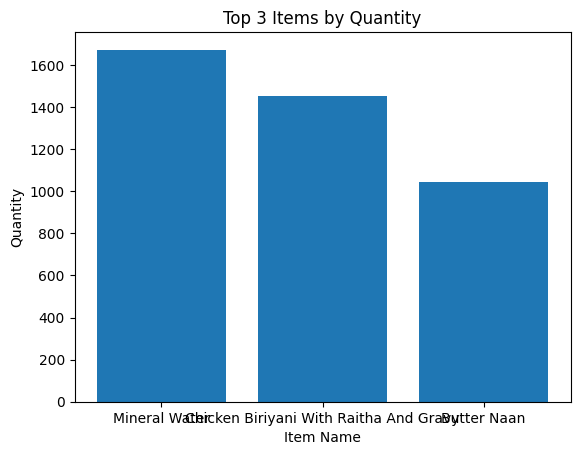

In [22]:
plt.bar(q.index,q.values)
plt.xlabel('Item Name')
plt.ylabel('Quantity')
plt.title('Top 3 Items by Quantity')
plt.plot()
plt.show()

In [23]:
r=d.groupby('Item Name')['Final Total'].sum().sort_values(ascending=False)[0:3]
r

,Final Total
Item Name,
Chicken Biriyani With Raitha And Gravy,240730.96
Chicken Fried Rice,119347.20
Butter Naan,65387.74


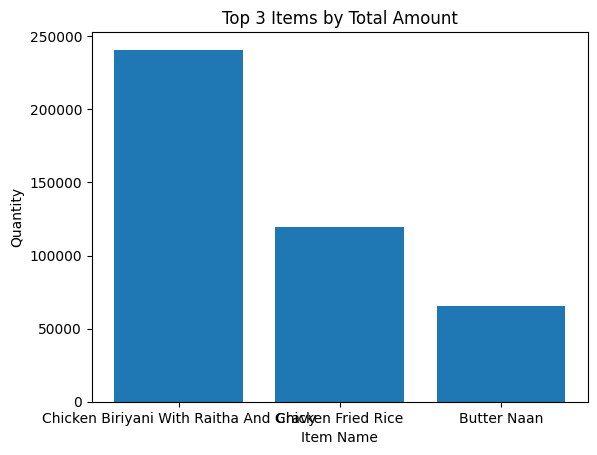

In [24]:
plt.bar(r.index,r.values)
plt.xlabel('Item Name')
plt.ylabel('Quantity')
plt.title('Top 3 Items by Total Amount')
plt.plot()
plt.show()

In [25]:

date=d[d['Date'] == '2023-09-14']
r=date.groupby('Invoice No.').sum()
r['Final Total'].sort_values(ascending=False)[0:3]

,Final Total
Invoice No.,
28215,1492.20
28195,1218.00
28220,1005.52


In [26]:
# identify the invoices whose bill value is above the overall average bill value
avg= d.groupby('Invoice No.').sum()
a =avg['Final Total'].mean()
invoices_above_average = avg['Final Total'] > a
invoices_above_average.sum()

np.int64(1458)

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [30]:
data=pd.read_csv('/content/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
d=DecisionTreeClassifier(criterion="entropy")
d.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [34]:
y_pred=d.predict(x_test)

In [35]:
accuracy=d.score(x_test,y_test)
print("accuracy:" ,accuracy)
classification = classification_report(y_test,d.predict(x_test))
print("classification:\n",classification)

accuracy: 0.7532467532467533
classification:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80        99
           1       0.64      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



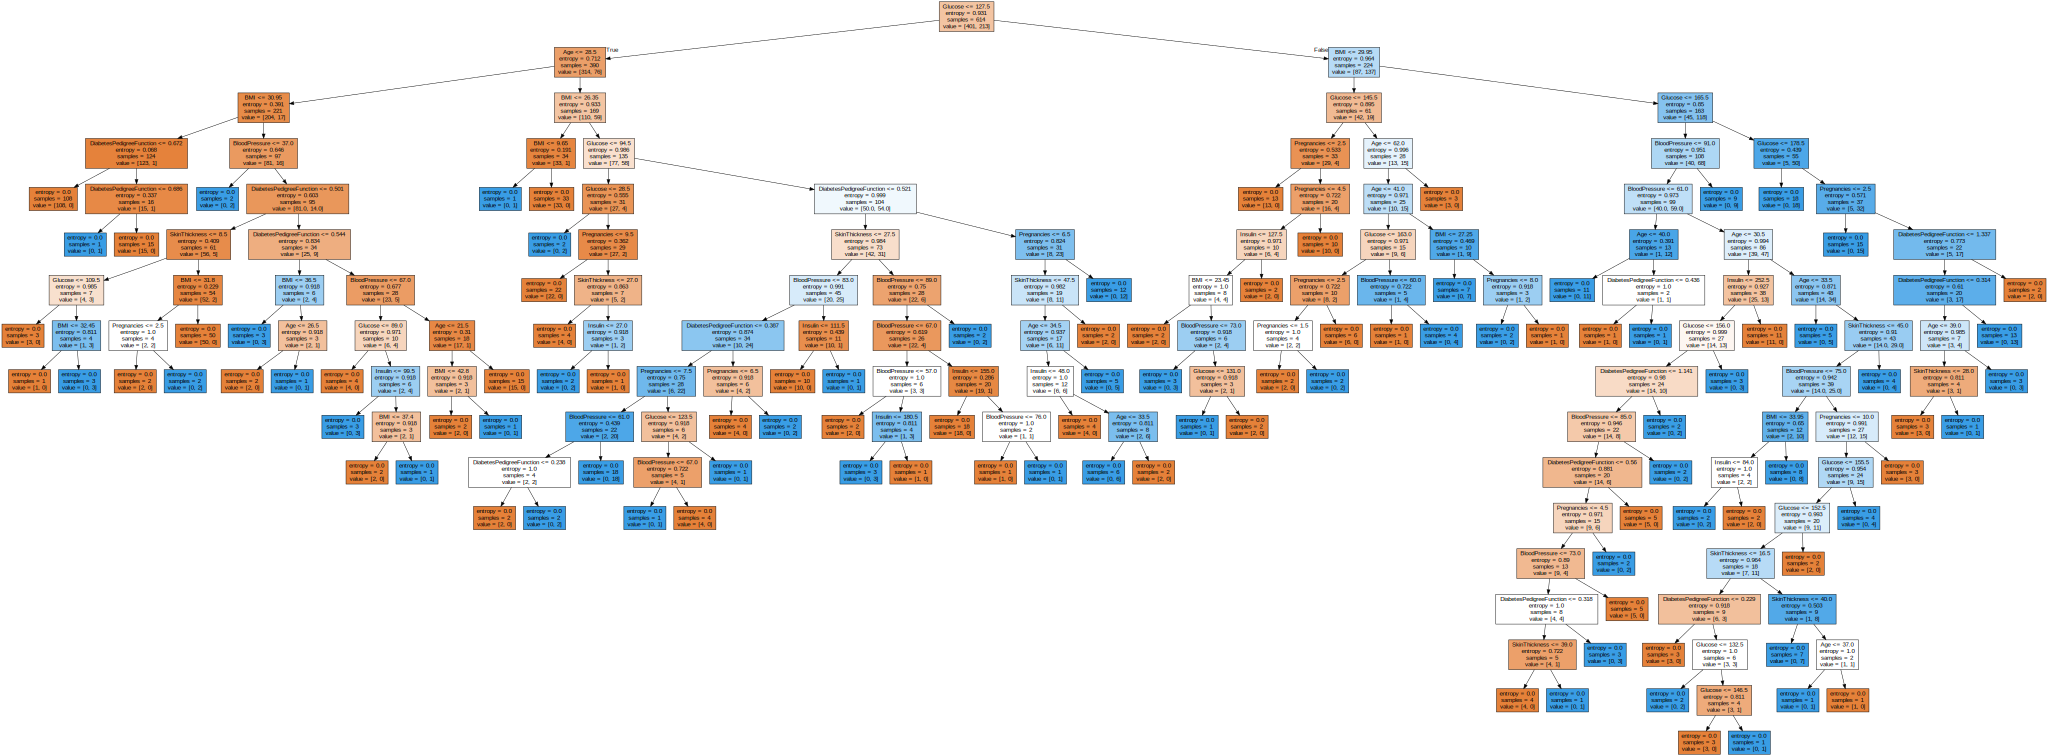

In [41]:
from sklearn.tree import export_graphviz
import graphviz
graph = graphviz.Source(export_graphviz(d,feature_names=x.columns,filled=True, ))
graph

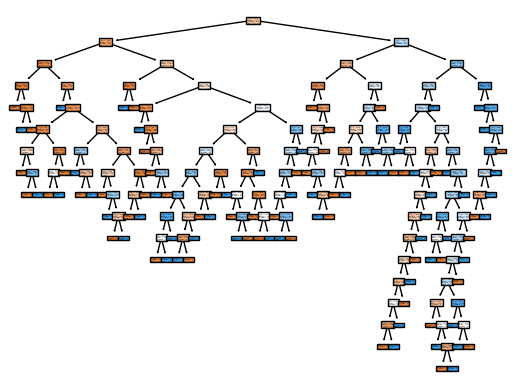

In [42]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(d,filled=True)
plt.show()